<a href="https://colab.research.google.com/github/sejalraikwa/UpskillCampus/blob/main/BankingInformatiionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/train.csv', sep=';', low_memory=True)
df_test = pd.read_csv('/content/test.csv', sep=';')

#Checking dimension of the train data

In [ ]:
df.shape

(45211, 17)

# Checking Information of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Checking each categorical class in countplot

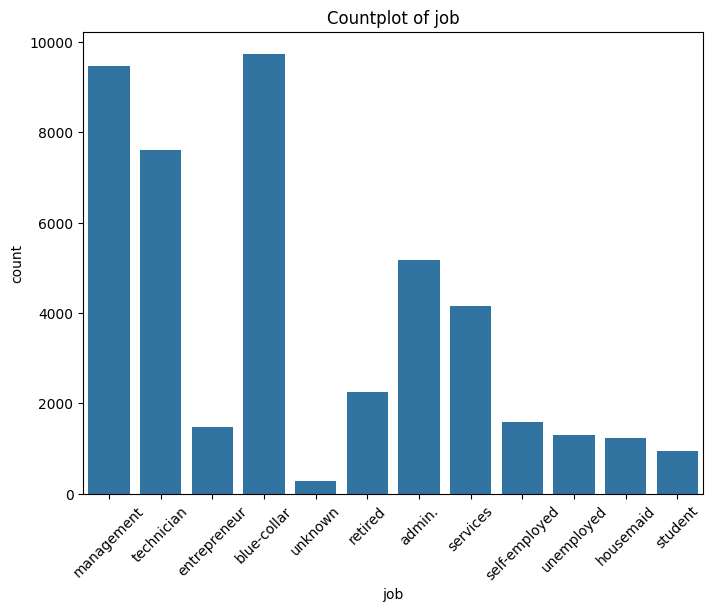

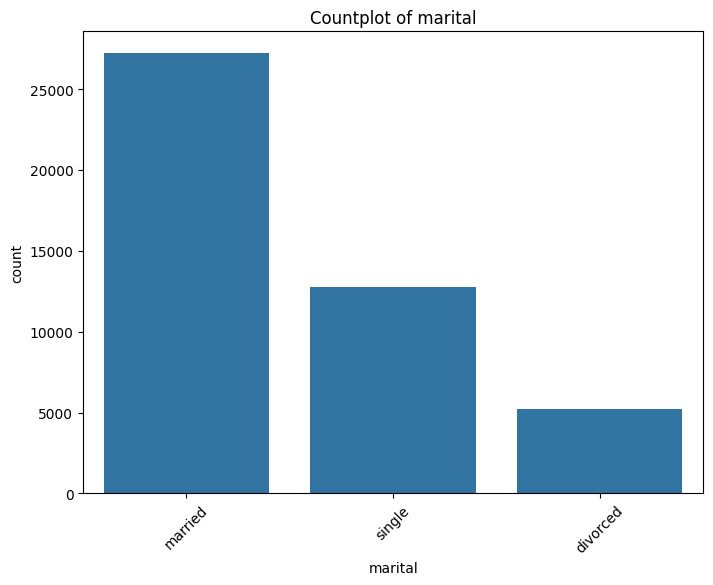

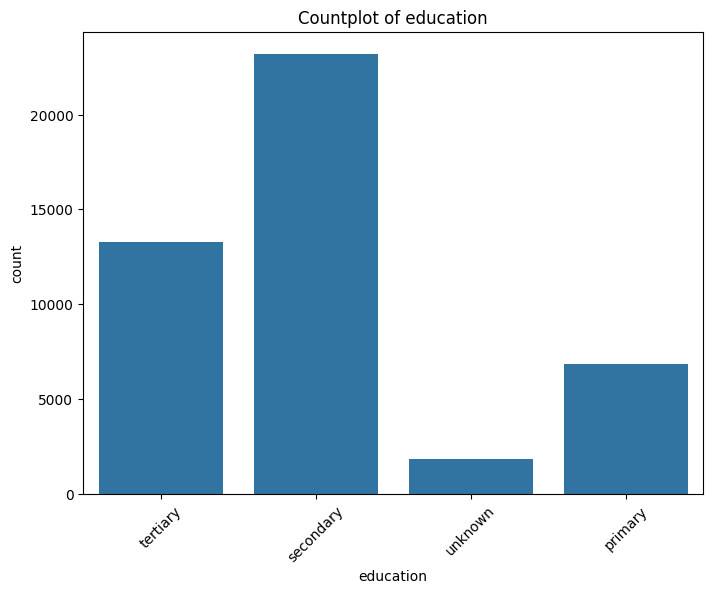

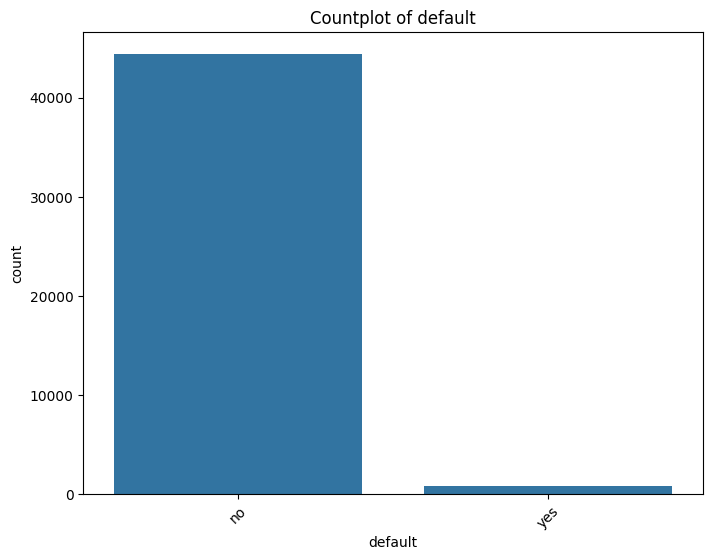

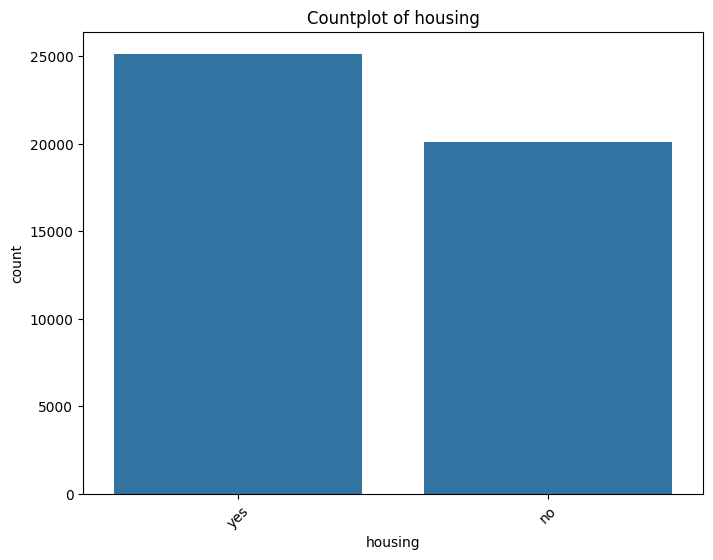

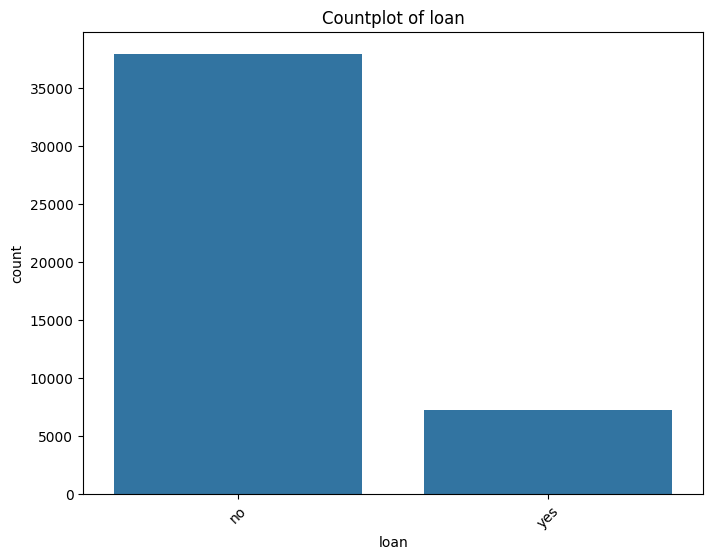

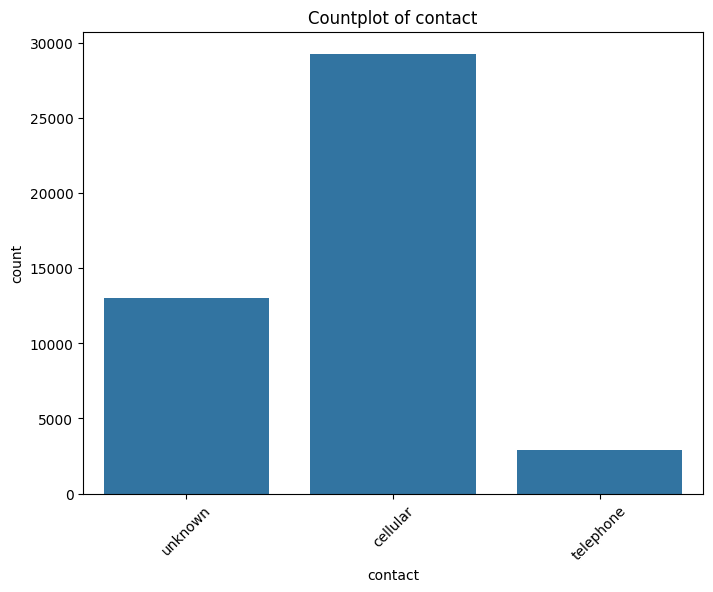

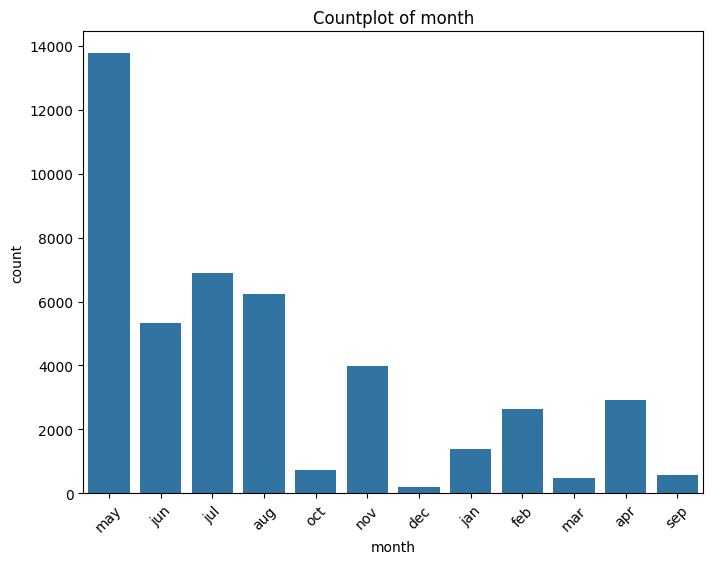

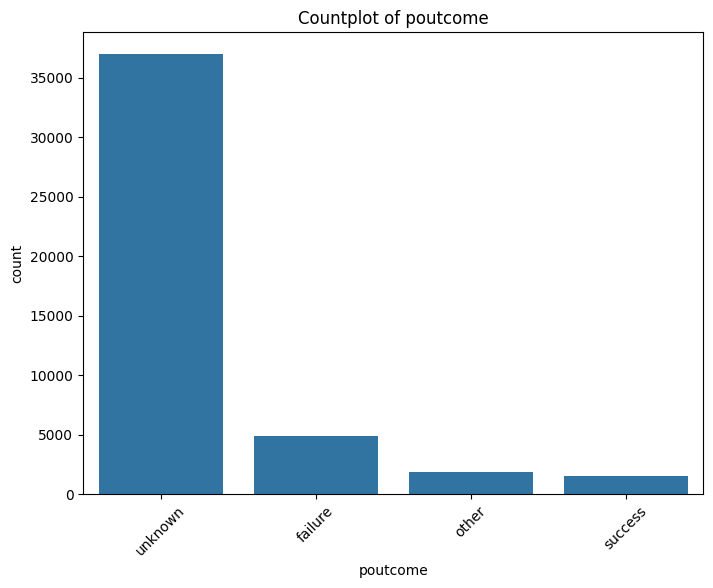

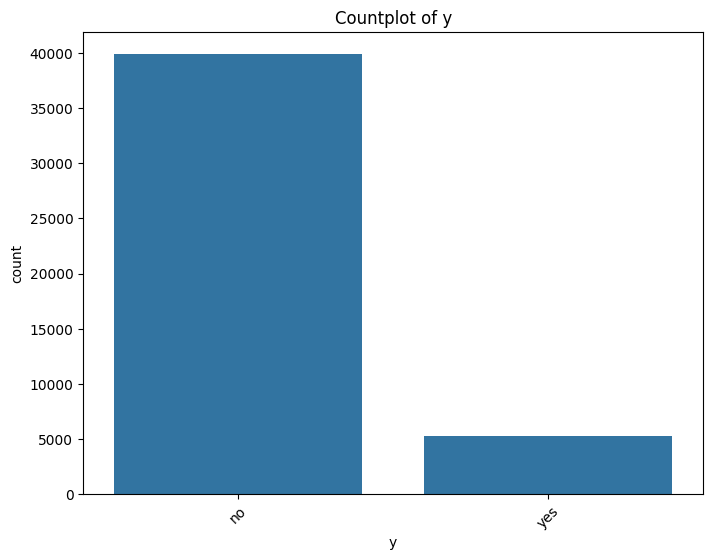

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

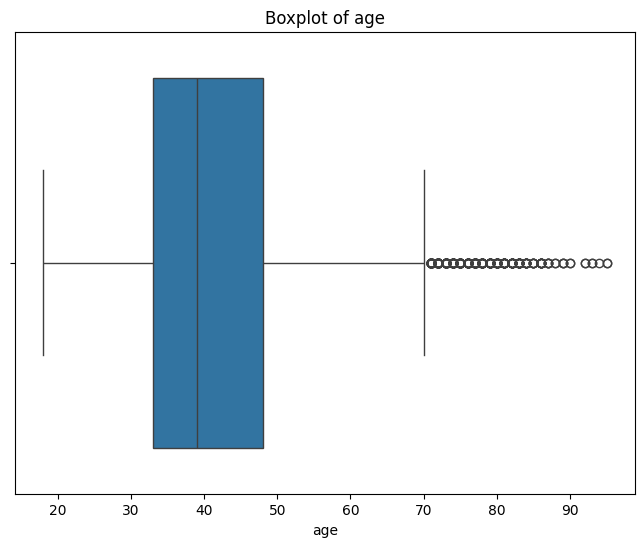

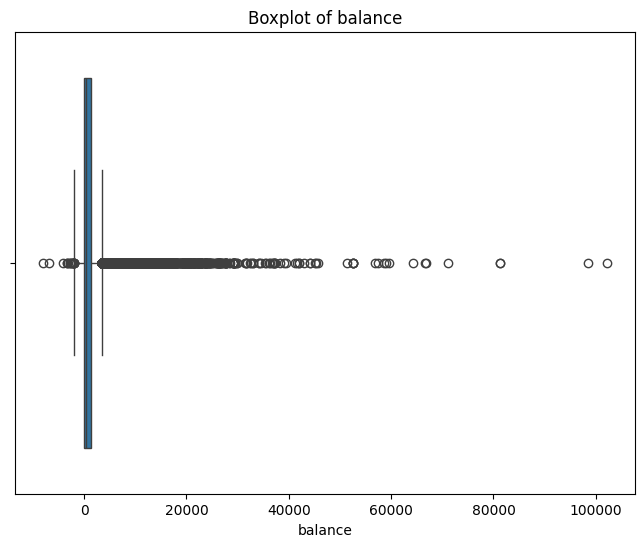

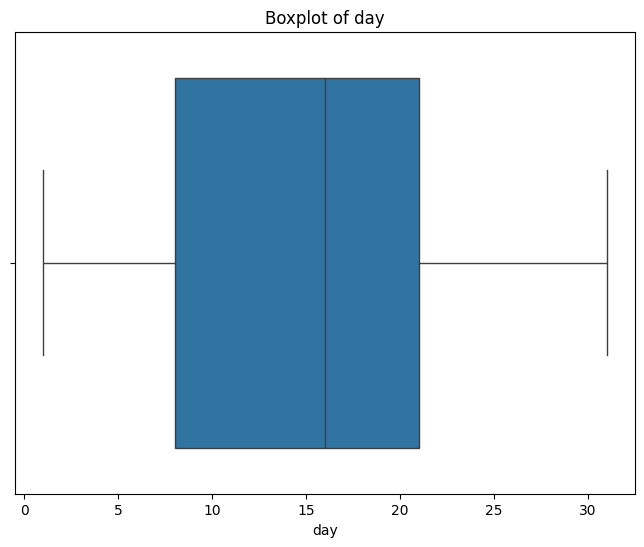

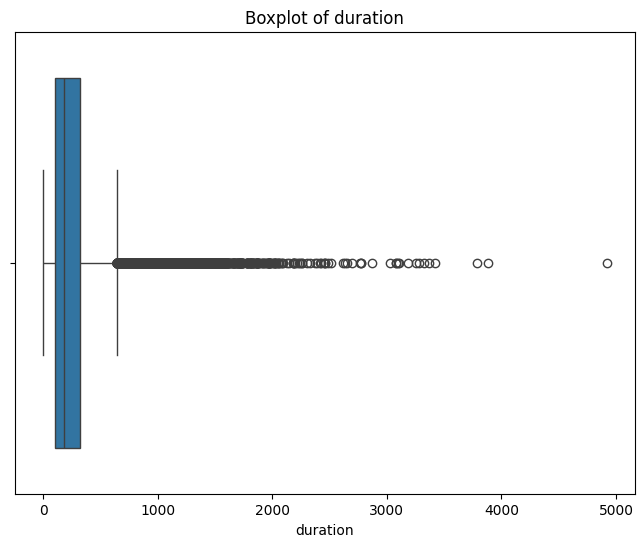

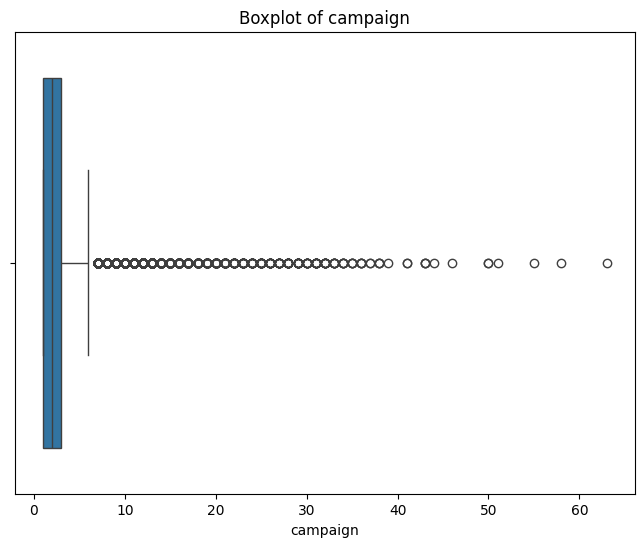

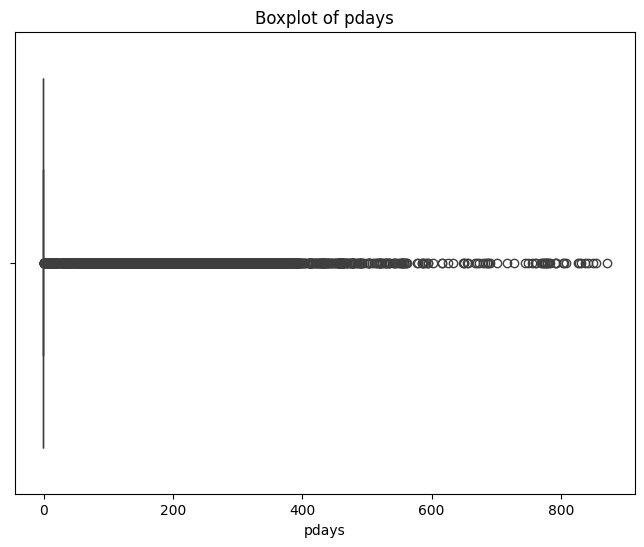

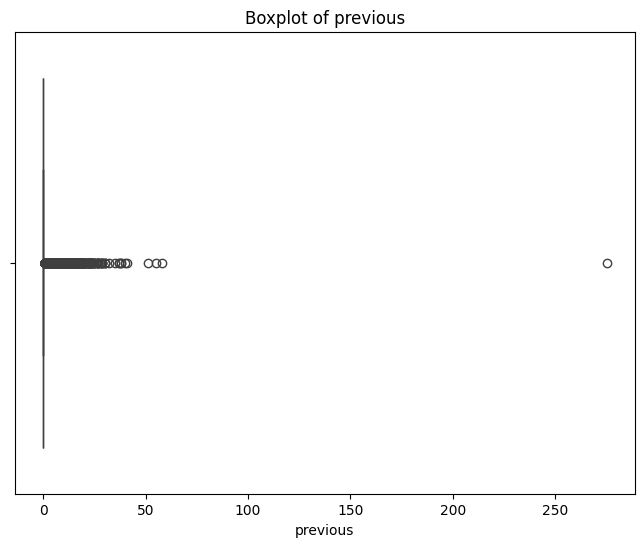

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

#Encode column to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in categorical_columns:
     df[column] = le.fit_transform(df[column])

# Display the updated DataFrame with encoded columns
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
print(df['y'].value_counts())
print(df.shape)

y
0    39922
1     5289
Name: count, dtype: int64
(45211, 17)


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('y', axis=1)
y = df['y']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

print(balanced_df['y'].value_counts())

y
0    39922
1    39922
Name: count, dtype: int64


In [ ]:
df = balanced_df.copy()
df.shape

(79844, 17)

#Scale features except target to become more distributed each other

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for column in df.select_dtypes(include=['number']).columns:
  if column != 'y':
    df[column] = ss.fit_transform(df[[column]])

display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.564005,-0.103342,-0.139102,1.204069,-0.104531,0.187401,1.268406,-0.326509,2.058692,-1.318605,0.935366,-0.334707,-0.525296,-0.488282,-0.335752,0.549526,0
1,0.283476,1.565330,1.528789,-0.225466,-0.104531,-0.478838,1.268406,-0.326509,2.058692,-1.318605,0.935366,-0.652476,-0.525296,-0.488282,-0.335752,0.549526,0
2,-0.722653,-0.770811,-0.139102,-0.225466,-0.104531,-0.487347,1.268406,3.062701,2.058692,-1.318605,0.935366,-0.869136,-0.525296,-0.488282,-0.335752,0.549526,0
3,0.557875,-1.104545,-0.139102,2.633604,-0.104531,-0.013353,1.268406,-0.326509,2.058692,-1.318605,0.935366,-0.822915,-0.525296,-0.488282,-0.335752,0.549526,0
4,-0.722653,2.232798,1.528789,2.633604,-0.104531,-0.487662,-0.788391,-0.326509,2.058692,-1.318605,0.935366,-0.516702,-0.525296,-0.488282,-0.335752,0.549526,0


In [ ]:
df.duplicated().sum()

np.int64(947)

#Dropping Duplicates

In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



estimators = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]


for estimator in estimators:
  print(f"Performing feature selection with {type(estimator).__name__}")


  rfe = RFE(estimator=estimator, n_features_to_select=8)

  rfe.fit(X_train, y_train)

  selected_features = X_train.columns[rfe.support_]

  print("Selected Features:", selected_features)
  print("-" * 100)

Performing feature selection with DecisionTreeClassifier
Selected Features: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'poutcome'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Performing feature selection with RandomForestClassifier
Selected Features: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Performing feature selection with GradientBoostingClassifier
Selected Features: Index(['job', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign',
       'poutcome'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Performing feature selection with XGBClassifier
Selected Features: Index(['education', 'housing', 'loan', 'contact'

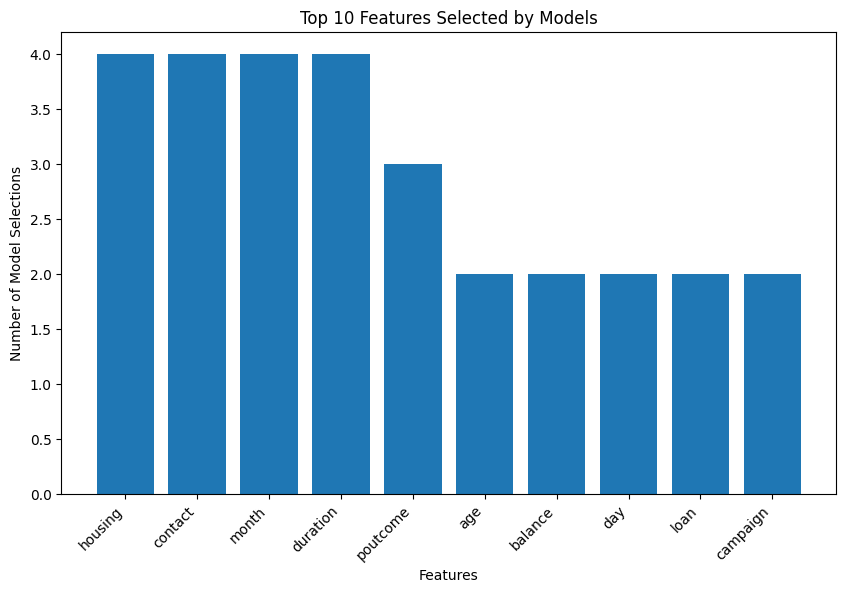

Overall Top 8 Features: ['housing', 'contact', 'month', 'duration', 'poutcome', 'age', 'balance', 'day', 'loan', 'campaign']


In [ ]:
feature_counts = {}
for estimator in estimators:
  rfe = RFE(estimator=estimator, n_features_to_select=8)
  rfe.fit(X_train, y_train)
  selected_features = X_train.columns[rfe.support_]
  for feature in selected_features:
    if feature in feature_counts:
      feature_counts[feature] += 1
    else:
      feature_counts[feature] = 1

sorted_features = sorted(feature_counts.items(), key=lambda item: item[1], reverse=True)

top_8_features = [feature for feature, count in sorted_features[:10]]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_8_features)), [count for feature, count in sorted_features[:10]])
plt.xticks(range(len(top_8_features)), top_8_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Number of Model Selections')
plt.title('Top 10 Features Selected by Models')
plt.show()

print("Overall Top 8 Features:", top_8_features)

# Create a new DataFrame with only the top 10 features and the target variable

In [ ]:
df_top_10 = df[top_8_features + ['y']]

print(df_top_10.head())

X = df_top_10.drop('y', axis=1)
y = df_top_10['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    housing   contact     month  duration  poutcome       age   balance  \
0  1.268406  2.058692  0.935366 -0.334707  0.549526  1.564005  0.187401   
1  1.268406  2.058692  0.935366 -0.652476  0.549526  0.283476 -0.478838   
2  1.268406  2.058692  0.935366 -0.869136  0.549526 -0.722653 -0.487347   
3  1.268406  2.058692  0.935366 -0.822915  0.549526  0.557875 -0.013353   
4 -0.788391  2.058692  0.935366 -0.516702  0.549526 -0.722653 -0.487662   

        day      loan  campaign  y  
0 -1.318605 -0.326509 -0.525296  0  
1 -1.318605 -0.326509 -0.525296  0  
2 -1.318605  3.062701 -0.525296  0  
3 -1.318605 -0.326509 -0.525296  0  
4 -1.318605 -0.326509 -0.525296  0  


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

# Code to define top_8_features (from cell HeCRwlxjqzV5)
feature_counts = {}
# Assuming 'estimators' and 'X_train', 'y_train' are available from previous steps
# Redefine estimators and X_train, y_train for this cell's scope
estimators = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

# Re-creating X and y from the original df to get correct column names for feature selection
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for estimator in estimators:
  rfe = RFE(estimator=estimator, n_features_to_select=8)
  rfe.fit(X_train, y_train)
  selected_features = X_train.columns[rfe.support_]
  for feature in selected_features:
    if feature in feature_counts:
      feature_counts[feature] += 1
    else:
      feature_counts[feature] = 1

sorted_features = sorted(feature_counts.items(), key=lambda item: item[1], reverse=True)

top_8_features = [feature for feature, count in sorted_features[:10]]

# Create a new DataFrame with only the top 10 features and the target variable
df_top_10 = df[top_8_features + ['y']]

X = df_top_10.drop('y', axis=1)
y = df_top_10['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

for estimator in estimators:
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  print(f"Model: {type(estimator).__name__}")
  print(f'Accuracy Score : {accuracy_score(y_test,y_pred):.2f}')
  print(f'Precision Score : {precision_score(y_test,y_pred):.2f}')
  print(f'Recall Score : {recall_score(y_test,y_pred):.2f}')
  print(f'F1_Score : {f1_score(y_test,y_pred):.2f}')
  print("-" * 50)
  print(classification_report(y_test, y_pred))
  print("-" * 50)
  print(f'This model : {type(estimator).__name__} done train!')

Model: DecisionTreeClassifier
Accuracy Score : 0.89
Precision Score : 0.88
Recall Score : 0.90
F1_Score : 0.89
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8014
           1       0.88      0.90      0.89      7766

    accuracy                           0.89     15780
   macro avg       0.89      0.89      0.89     15780
weighted avg       0.89      0.89      0.89     15780

--------------------------------------------------
This model : DecisionTreeClassifier done train!
Model: RandomForestClassifier
Accuracy Score : 0.93
Precision Score : 0.91
Recall Score : 0.95
F1_Score : 0.93
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8014
           1       0.91      0.95      0.93      7766

    accuracy                           0.93     15780
   macro avg       0.93      0.9

#searching best parameters on my models


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


param_distributions = {
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'bootstrap': [True, False]
    },
    'GradientBoostingClassifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': randint(2, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'XGBClassifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': randint(2, 10),
        'min_child_weight': randint(1, 10),
        'gamma': [0, 0.1, 0.2]
    }
}

estimators = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

for estimator in estimators:
  model_name = type(estimator).__name__
  print(f"Performing RandomizedSearchCV for {model_name}")

  random_search = RandomizedSearchCV(
      estimator=estimator,
      param_distributions=param_distributions.get(model_name, {}),
      n_iter=20,
      cv=5,
      scoring='accuracy',
      random_state=42,
      n_jobs=-1
  )


  random_search.fit(X_train, y_train)

  print("Best Parameters:", random_search.best_params_)
  print("Best Score:", random_search.best_score_)
  print("-" * 50)


  best_estimator = random_search.best_estimator_
  best_estimator.fit(X_train, y_train)

  y_pred = best_estimator.predict(X_test)

  print(f"Model: {model_name} with best parameters")
  print(f'Accuracy Score : {accuracy_score(y_test,y_pred):.2f}')
  print(f'Precision Score : {precision_score(y_test,y_pred):.2f}')
  print(f'Recall Score : {recall_score(y_test,y_pred):.2f}')
  print(f'F1_Score : {f1_score(y_test,y_pred):.2f}')
  print("-" * 50)
  print(classification_report(y_test, y_pred))
  print("-" * 50)
  print(f'This model : {model_name} with best parameters done train!')

Performing RandomizedSearchCV for DecisionTreeClassifier
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Score: 0.8774023657903316
--------------------------------------------------
Model: DecisionTreeClassifier with best parameters
Accuracy Score : 0.88
Precision Score : 0.86
Recall Score : 0.91
F1_Score : 0.88
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      8014
           1       0.86      0.91      0.88      7766

    accuracy                           0.88     15780
   macro avg       0.88      0.88      0.88     15780
weighted avg       0.88      0.88      0.88     15780

--------------------------------------------------
This model : DecisionTreeClassifier with best parameters done train!
Performing RandomizedSearchCV for RandomForestClassifier
Best Parameters: {'bootstrap': False, 'max_depth': 9, 'min_samples_leaf'